In [1]:
print("This line wiil be Printed")

This line wiil be Printed


In [ ]:
print("Hello world")


## Supervised Learning

In [3]:
# import libraries and datasets
import matplotlib.pyplot as plt
import numpy as np

# importing datasets from scikit-learn
from sklearn import datasets, linear_model

In [4]:
# datasets
house_price = [245, 312, 279, 308, 199, 219, 405, 324,319, 255]
size = [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]


In [15]:
# Reshape the input to your regression
size2 = np.array(size).reshape(-1,1)
print(size2)

[[1400]
 [1600]
 [1700]
 [1875]
 [1100]
 [1550]
 [2350]
 [2450]
 [1425]
 [1700]]


In [16]:
# fit regression model
regr = linear_model.LinearRegression()
regr.fit(size2, house_price)
print("Coefficients: \n", regr.coef_)
print("intercept: \n ", regr.intercept_)

Coefficients: 
 [0.10976774]
intercept: 
  98.24832962138078


In [21]:
# Formula obtained for the trained model
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y)

In [19]:
size_new = 1400
price = (size_new * regr.coef_) + regr.intercept_
print(price)
print(regr.predict([[size_new]]))

[251.92316258]
[251.92316258]


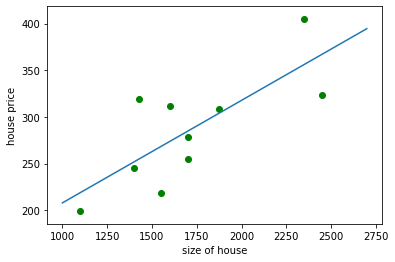

In [24]:
graph('regr.coef_*x + regr.intercept_', range(1000,2700))
plt.scatter(size, house_price, color='green')
plt.ylabel("house price")
plt.xlabel("size of house")
plt.show()

## Unsupervised Learning
### K-means clustering

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

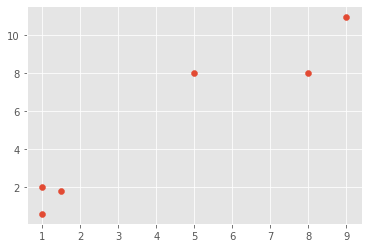

In [26]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(x,y)
plt.show()

In [27]:
# Convert data into numpy array manually 
X = np.array([[1,2], [5,8], [1.5,1.8], [8,8], [1,0.6], [9,11]])
# OR use zip command in combination with list
# X = np.array(list(zip(x,y)))
# We initialize K-means algorithm with requited paramaters and we use .fit() to fit the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Getting the values of centroids and labels based on the fit
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]


coordinate: [1. 2.] label: 0
coordinate: [5. 8.] label: 1
coordinate: [1.5 1.8] label: 0
coordinate: [8. 8.] label: 1
coordinate: [1.  0.6] label: 0
coordinate: [ 9. 11.] label: 1


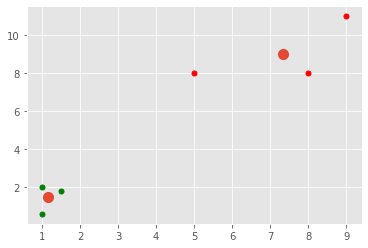

In [30]:
colors = ["g.", "r.", "c.","y."]
for i in range(len(X)):
    print("coordinate:", X[i], "label:", labels[i])
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize = 10 )
plt.scatter(centroids[:,0], centroids[:,1], marker = ".", 
            s= 150, linewidth = 5, zorder = 10)
plt.show()

### Reinforced Learning
### Use Case - Weather Analysis

In [36]:
import pandas as pd
data = pd.read_csv('xclara.csv', index_col=[0])
print(data.shape)
data.head(10)

(3000, 2)


,Temp_diff,Pressure_diff
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729
6,24.169930,32.024780
7,21.665780,4.892855
8,4.693684,12.342170
9,19.211910,-1.121366
10,4.230391,-4.441536


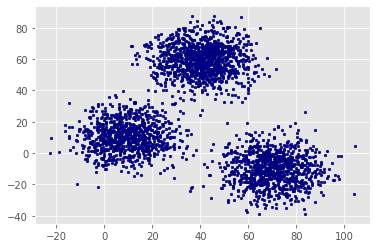

In [37]:
f1 = data['Temp_diff'].values
f2 = data['Pressure_diff'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='navy', s=7)

In [40]:
# Euclidian distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [41]:
# number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x,C_y)), dtype = np.float32)
print(C)

[[13.  5.]
 [62. 44.]
 [54. 55.]]


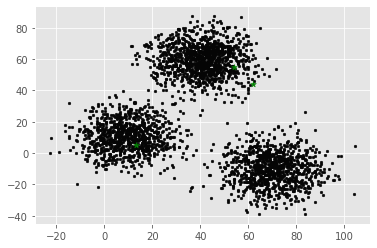

In [42]:
plt.scatter(f1,f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*',c='g')

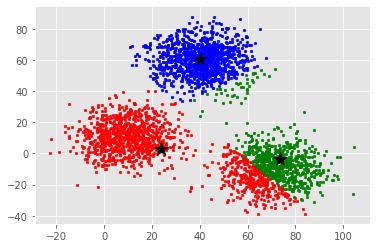

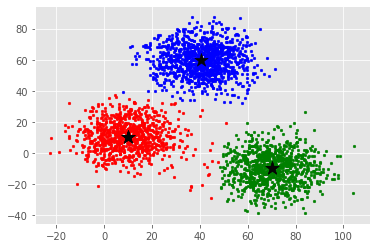

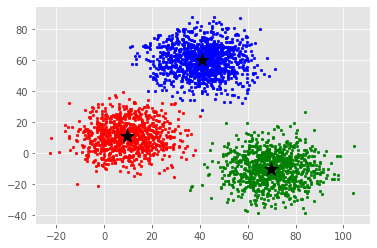

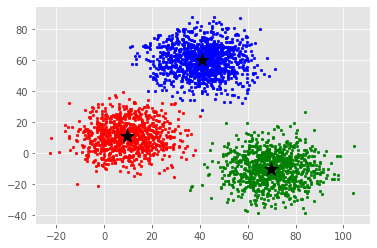

In [46]:
from copy import deepcopy
# Store the values of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Labels(0, 1, 2)
clusters = np.zeros(len(X))

# Error function: distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run until the error becomes zero
while error !=0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)

    # Finding the new centroid by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] ==i]
        C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        ax.scatter(C[:,0], C[:, 1], marker='*', s=200, c='#050505')
    plt.show()


## SVM classifier 

In [47]:
from sklearn import svm
from sklearn import datasets

In [48]:
iris = datasets.load_iris()

In [49]:
type(iris)

sklearn.utils.Bunch

In [50]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
X = iris.data
# print(X)

In [73]:
Y = iris.target

In [58]:
# from sklearn.crossvalidation import train_test_split

In [57]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)


In [76]:
model = svm.SVC(kernel='linear')

In [77]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.9666666666666667


## KNN / K nearest neighbour

In [92]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [93]:
X = iris.data
y = iris.target
X.shape

(150, 4)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [95]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [99]:
knn.predict([np.array([4,5,6,2])])

array([2])

In [100]:
from sklearn import linear_model

In [102]:
logReg = linear_model.LogisticRegression()
logReg.fit(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
logReg.predict([np.array([4,5,6,2])])

array([2])

# Use case implementation of Linear Regression

In [104]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [105]:
companies = pd.read_csv("1000_Companies.csv")

In [111]:
companies.shape
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [109]:
for column in companies.columns:
    print(column,)
list(companies.columns)

R&D Spend
Administration
Marketing Spend
State
Profit


['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [136]:
X = companies.iloc[:, :-1]
y = companies.iloc[:, 4]

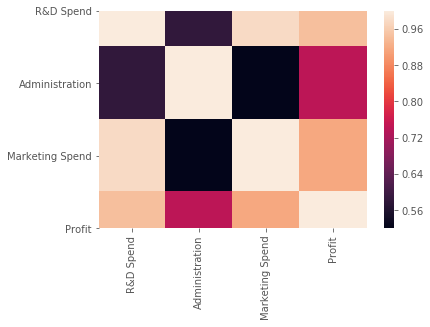

In [137]:
# Data Visualization
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [138]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X.iloc[:, 3] = labelencoder.fit_transform(X.iloc[:, 3])

onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [139]:
X = X[:, 1:]

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
y_pred = model_fit.predict(X_test)
y_pred

array([ 89790.61532915,  88427.0718736 ,  94894.67836971, 175680.86725612,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050988, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053063,  75316.2814305 ,
       118248.14406603, 164574.40699903, 170937.2898107 , 182069.11645085,
       118845.03252688,  85669.95112228, 180992.59396145,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.07669089,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529206, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.48986819, 158416.46827611,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924518, 174609.08266881,
        93745.66352058,  

In [144]:
print(model_fit.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [145]:
print(model_fit.intercept_)

-51035.2297240443


In [146]:
# calculating the R squared values 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268861

## Use Case Implementation of Logistic Regression

In [149]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

**Determining the total number of images and labels** 

In [150]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


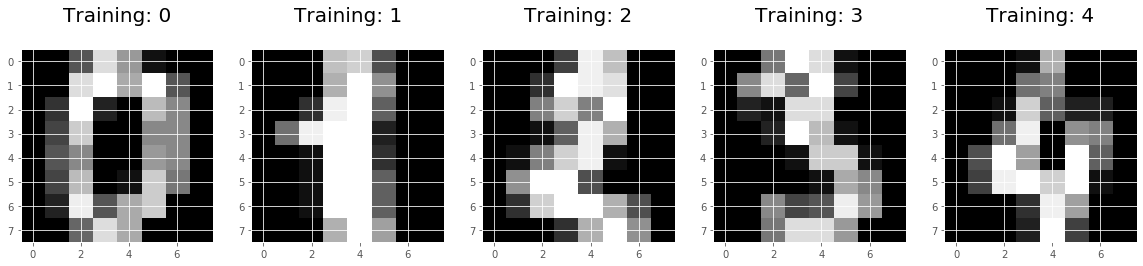

In [152]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Dividing dataset into Training and Test sets**

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 2)

In [154]:
print(x_train.shape)

(1437, 64)


In [155]:
print(y_train.shape)

(1437,)


In [156]:
print(x_test.shape)

(360, 64)


In [157]:
print(y_test.shape)

(360,)


In [158]:
from sklearn.linear_model import LogisticRegression

In [161]:
logisticRegr = LogisticRegression(solver='liblinear', multi_class='auto')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Prdicting the output of the first element of the test set**

In [162]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


**Predicting the output of the first 10 elements of the test set**

In [163]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

**Predicting for the entire test dataset**

In [165]:
predictions = logisticRegr.predict(x_test)

In [166]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9361111111111111


**Representing the confusion matrix in heat map**

In [168]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  3  2  0]
 [ 0  2  0  0 31  0  0  0  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  1  0  1  3 22]]


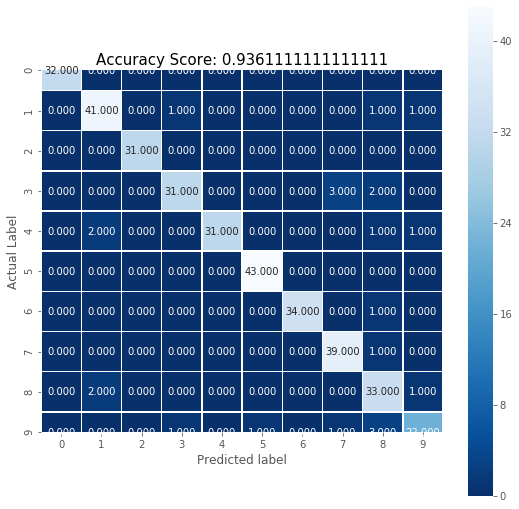

In [169]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

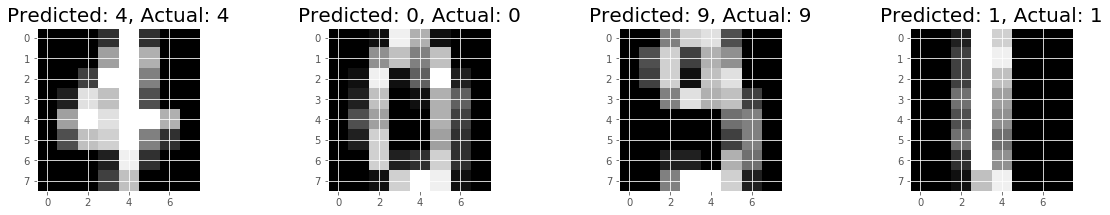

In [172]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

# Logistic Regression with Titanic data

In [181]:
t_test = pd.read_csv("/Users/dnyansagar/Dropbox/DataScience/IntroToDataScience/test.csv")
print(t_test.shape)
t_train = pd.read_csv("/Users/dnyansagar/Dropbox/DataScience/IntroToDataScience/train.csv")
print(t_train.shape)
print(t_train.columns)
print(t_test.columns)

(418, 10)
(891, 11)
Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')
Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')


In [184]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
t_train.dtypes


survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

# K-mer counting for DNA classification